
Single Hidden Layer MLP Results:
  MSE: 0.2091
  R^2: 0.8913


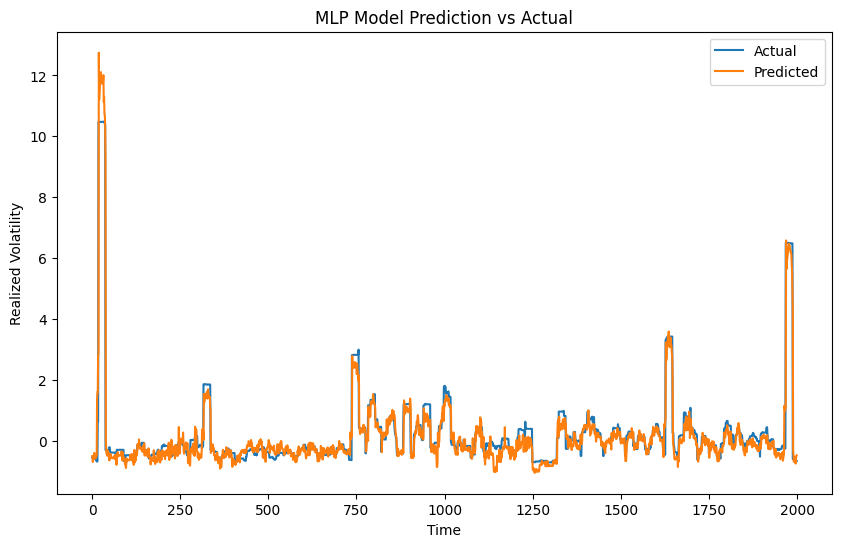

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("/Users/hanzichun/desktop/Optiver-07/Data/S27FE-10K.csv")

# Data Preprocessing: Only use past information for training
# Assuming 'realized_volatility' is the target, avoid leakage by shifting the target for time series
df['target'] = df['realized_volatility'].shift(-1)  # Make sure target is not future data

# Drop the last row (which has NaN in target due to shift)
df = df.dropna()

# Normalize features
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

# Prepare the data
X = df_scaled.drop(['realized_volatility', 'target'], axis=1)
y = df_scaled['target']

# Train/test split
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    shuffle=False  # Important to not shuffle time series data
)

# Initialize and train the MLP model
single_layer_mlp = MLPRegressor(
    hidden_layer_sizes=(64,),
    activation='relu',
    solver='adam',
    shuffle=False,  # No shuffle for time series
    learning_rate_init=1e-4,    
    alpha=1e-4,                  
    max_iter=500,
    random_state=42
)

# Train the model
single_layer_mlp.fit(X_train_scaled, y_train)

# Predict on test data
y_pred_single = single_layer_mlp.predict(X_test_scaled)

# Calculate performance metrics
mse_single = mean_squared_error(y_test, y_pred_single)
r2_single = r2_score(y_test, y_pred_single)

# Display the results
print("\nSingle Hidden Layer MLP Results:")
print(f"  MSE: {mse_single:.4f}")
print(f"  R^2: {r2_single:.4f}")

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred_single, label='Predicted')
plt.title('MLP Model Prediction vs Actual')
plt.xlabel('Time')
plt.ylabel('Realized Volatility')
plt.legend()
plt.show()
